# Google Stock Price Prediction Using LSTM

### Step 1: Importing the Libraries

In [15]:
#Importing the Libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

### Step 2: Loading the Stock Market Prediction Data

In [16]:
#Get the Dataset
df=pd.read_csv("GOOG.csv",na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)
df.head()

/var/folders/dy/n39312m176q_0131_6rzrpxm0000gn/T/ipykernel_64016/3099248548.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df=pd.read_csv("GOOG.csv",na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512


### Step 3: Checking for Null Values by Printing the DataFrame Shape

In [17]:
#Print the shape of Dataframe  and Check for Null Values
print("Dataframe Shape: ", df. shape)
print("Null Value Present: ", df.isnull().values.any())

Dataframe Shape:  (4951, 6)
Null Value Present:  False


### Step 4: Plotting the True Adjusted Close Value

<Axes: xlabel='Date'>

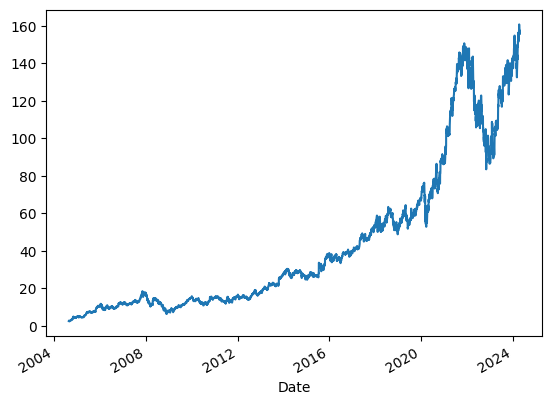

In [18]:
#Plot the True Adj Close Value
df['Adj Close'].plot()

### Step 5: Setting the Target Variable

In [19]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

4704

### Step 6: Scaling

In [20]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
train_data = scaled_data[0:int(training_data_len), :]

### Step 7: Creating a Training Set for Stock Market Prediction

In [21]:
# Split the data into x_train and y_train data sets
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()


[array([5.19270232e-05, 1.30592041e-03, 1.47741857e-03, 7.64672795e-04,
       9.42462837e-04, 1.24298259e-03, 9.66063732e-04, 3.14682814e-04,
       3.71322436e-04, 3.77639592e-05, 2.36008952e-04, 0.00000000e+00,
       2.47026072e-04, 3.60311633e-04, 3.61884605e-04, 8.37048453e-04,
       1.17847179e-03, 1.80625813e-03, 1.88649865e-03, 2.19645623e-03,
       2.75029394e-03, 3.04451548e-03, 2.80536059e-03, 2.89032002e-03,
       3.27423255e-03, 3.11846411e-03, 2.87144436e-03, 4.22456024e-03,
       4.88853125e-03, 4.65566825e-03, 5.12454021e-03, 5.51473830e-03,
       6.03553097e-03, 5.83256706e-03, 6.11105257e-03, 5.93483550e-03,
       5.54621038e-03, 5.88291480e-03, 6.43360025e-03, 6.60667137e-03,
       6.93865688e-03, 7.73322245e-03, 7.54126935e-03, 6.36908945e-03,
       7.76783415e-03, 1.13945072e-02, 1.37498714e-02, 1.28687735e-02,
       1.35248796e-02, 1.46781712e-02, 1.42596533e-02, 1.51077062e-02,
       1.49251973e-02, 1.44217073e-02, 1.33250553e-02, 1.09098992e-02,
     

### Step 8: Data Processing For LSTM

In [22]:
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

### Step 9: Building the LSTM Model for Stock Market Prediction

In [23]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Step 10: Training the Stock Market Prediction Model

In [24]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

4644/4644 ━━━━━━━━━━━━━━━━━━━━ 50s 11ms/step - loss: 0.0017


### Step 11: Making the LSTM Prediction

In [25]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


9.779434669353103

### Step 12: Comparing Predicted vs True Adjusted Close Value – LSTM

/var/folders/dy/n39312m176q_0131_6rzrpxm0000gn/T/ipykernel_64016/1419599064.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


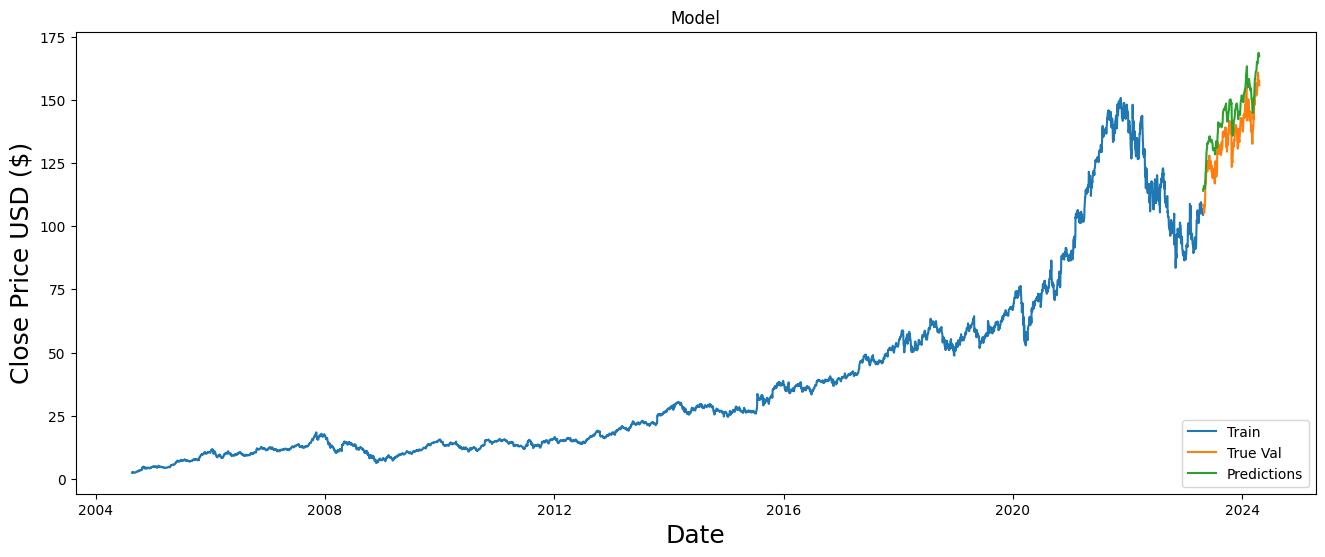

In [26]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'True Val', 'Predictions'], loc='lower right')
plt.show()

In [27]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2023-04-27,108.370003,113.997612
2023-04-28,108.220001,114.678719
2023-05-01,107.709999,115.465363
2023-05-02,105.980003,115.966743
2023-05-03,106.120003,115.803207
...,...,...
2024-04-15,156.330002,168.585327
2024-04-16,156.000000,168.216278
2024-04-17,156.880005,167.566849
